In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


from scipy import optimize
from scipy.optimize import curve_fit

import os
from functools import reduce
import scipy
from scipy.stats.stats import pearsonr
from scipy import stats
from scipy.stats import ks_2samp
from scipy.stats import entropy
from scipy.stats import norm
from scipy.stats import lognorm
from scipy.stats import nbinom
from scipy.stats import expon
from scipy.stats.mstats import gmean

from scipy import optimize
from scipy.optimize import curve_fit

import statsmodels.api as sm
lowess = sm.nonparametric.lowess
import math

import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture

In [62]:
dg = pd.read_csv("https://github.com/ucbmcb288/data/blob/master/dge_normalized.txt?raw=true", sep="\t")

In [63]:
dg

,GTACTAATTACN_2,AGGCTAATGGAC_3,TAGACAAAAGCT_4,TCTACTAGTGTN_5,CCGTGCTGAACA_3,GAGAAAATGAAG_7,GCCTAGTGACGT_4,CAGTATCGAGAN_2,AGATTACCCTTC_6,AACCCCACGCTC_2,...,TAGAGGACCGTA_3,TTGGGTAACAGC_3,GTGAGCTTATGG_3,GCTTCTCCGTCT_3,GCTTGGAAATCC_7,GCGATCAGTCTT_3,AGAACGATATAC_8,CCGATTCGCTTN_4,CCTCTCAGTCTC_5,GACTCTCTCGCA_4
128up,2.5699,2.5087,0.0000,0.0000,0.0000,0.0000,0.0000,2.5561,2.5071,2.3432,...,0.0000,0.0000,3.5265,0.0000,0.0000,0.0000,0.0000,1.9716,0.0000,0.0000
140up,1.1599,3.0066,0.0000,0.0000,0.0000,3.2493,3.2082,3.9674,0.0000,0.0000,...,3.4705,0.0000,3.5265,3.1248,2.8336,3.2716,3.4109,2.7748,0.0000,0.0000
14-3-3epsilon,8.8384,8.7878,8.8431,8.8687,8.3452,8.9987,8.7877,8.8601,8.6240,8.7304,...,8.3828,8.1859,9.0986,8.5528,8.8086,8.8982,8.0289,8.3328,8.5545,7.7798
14-3-3zeta,5.9422,5.4336,6.0169,5.0161,6.0097,5.8153,5.6568,5.3236,6.6349,6.0485,...,4.4039,5.4592,6.9919,5.8807,6.3340,6.5884,5.6201,5.1725,4.6401,5.3180
18w,3.4430,3.0066,2.3175,4.0600,3.5326,2.3936,3.2082,2.5561,0.0000,0.0000,...,3.4705,0.0000,0.0000,0.0000,3.7287,0.0000,0.0000,0.0000,5.6108,3.4226
26-29-p,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2mit,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4EHP,4.6831,3.9139,3.1650,4.0600,4.2188,5.2961,2.3564,2.5561,0.0000,3.1935,...,0.0000,3.5544,0.0000,2.2813,3.7287,3.2716,0.0000,1.9716,0.0000,2.5513
4E-T,1.7945,2.5087,2.3175,3.6735,2.1776,0.0000,2.3564,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,2.2813,0.0000,0.0000,0.0000,0.0000,0.0000,2.5513
5-HT1A,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [64]:
# number of cells

len(dg.columns)

1297

In [5]:
X = (dg.values).T

In [6]:
pca = PCA(n_components = 10)

In [7]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

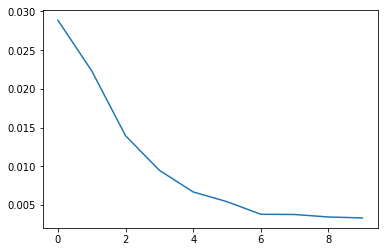

In [8]:
plt.plot(pca.explained_variance_ratio_)

In [9]:
X_pca = pca.transform(X)

In [10]:
dgpca = pd.DataFrame(data = X_pca)
dgpca['cellID'] = dg.columns
dgpca = dgpca.set_index("cellID")

In [11]:
dgpca

,0,1,2,3,4,5,6,7,8,9
cellID,,,,,,,,,,
GTACTAATTACN_2,-50.578494,-0.722674,4.591517,-8.866988,14.555498,2.272650,-8.007811,-1.877870,3.643742,-7.137261
AGGCTAATGGAC_3,-35.965545,8.530567,-10.002884,-15.239806,5.314439,0.440220,-8.742071,-6.744279,2.449479,-4.309700
TAGACAAAAGCT_4,-31.321712,-8.812651,12.396933,-3.294188,-1.840013,2.043507,-5.627840,-1.424544,6.594829,2.596898
TCTACTAGTGTN_5,-27.194550,6.970546,0.009361,0.720135,28.235109,2.911560,3.701410,0.064348,-10.739707,2.785380
CCGTGCTGAACA_3,-22.801996,-9.786833,-6.722041,-12.423859,-6.067546,11.055701,-5.780788,5.283993,2.694665,1.774143
GAGAAAATGAAG_7,-23.780649,-5.182548,-0.963558,-3.324593,0.608732,-0.108421,1.251775,7.399623,-0.525336,-9.914864
GCCTAGTGACGT_4,-26.881935,-18.823713,-6.121751,4.206214,6.013827,11.967286,-0.036247,-5.719603,4.166600,-2.528669
CAGTATCGAGAN_2,-22.099976,-10.170358,-3.363043,-3.920781,12.531631,0.517181,2.511597,3.630982,-6.648605,-1.590157
AGATTACCCTTC_6,-18.433824,12.903931,-12.437715,25.244061,-9.054910,1.907446,-11.731338,6.223622,1.784731,7.059973


In [36]:
rs = np.random.RandomState()

In [44]:
seed = rs.get_state()

In [51]:
rs.set_state(seed)

In [52]:
tsne = TSNE(n_components=2, early_exaggeration = 20, method='exact', random_state = 2056814238)
X_pca_embed = tsne.fit_transform(X_pca)

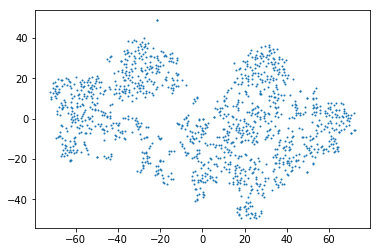

In [53]:
plt.scatter(X_pca_embed[:,0],X_pca_embed[:,1],s=1)

In [54]:
tsne = TSNE(n_components=2, early_exaggeration = 20, method='exact', random_state = 2056814238)
X_pca_embed = tsne.fit_transform(X_pca)

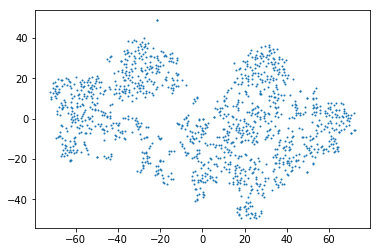

In [55]:
plt.scatter(X_pca_embed[:,0],X_pca_embed[:,1],s=1)

In [56]:
gmm = GaussianMixture(n_components=15)

In [57]:
gmmX = gmm.fit(X_pca_embed)

In [58]:
gmmXp = gmmX.predict(X_pca_embed)

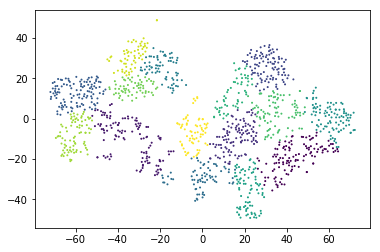

In [59]:
plt.scatter(X_pca_embed[:,0],X_pca_embed[:,1],s=1, c=gmmXp)

In [65]:
insitu = pd.read_csv("data/single/insitu_matrix.txt",sep=' ')

In [66]:
insitu

,aay,Ama,Ance,Antp,apt,Blimp-1,bmm,bowl,brk,Btk29A,...,tkv,tll,toc,Traf4,trn,tsh,twi,zen,zen2,zfh1
0,0,1,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,1,1,1,1,1,1,...,0,0,0,1,1,0,1,0,0,0
2,0,0,0,0,1,1,1,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,1,1,1,1,1,1,...,0,0,0,1,1,0,1,0,0,0
4,0,0,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
5,0,1,0,0,1,1,1,1,1,1,...,0,0,0,1,1,0,1,0,0,0
6,0,1,0,0,1,1,1,1,0,1,...,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,1,1,0,1,1,1,...,0,0,0,0,0,0,1,0,0,0
8,0,1,0,0,1,1,1,1,1,1,...,0,0,0,0,1,0,1,0,0,0
9,0,1,0,0,1,1,1,1,1,1,...,0,0,0,0,1,0,1,0,0,0


In [67]:
gdf = pd.read_csv("data/single/geometry.txt",sep=" ")

In [69]:
gdf

,x,y,z
0,-194.042242,0.221890,30.195476
1,-203.322900,1.928557,20.081308
2,-200.250107,3.588368,23.932470
3,-205.875337,3.577224,14.820966
4,-193.173936,9.531855,29.667388
5,-206.592460,4.751420,12.235078
6,-198.129293,10.862470,24.376122
7,-194.702247,14.418339,26.538214
8,-203.747996,9.776161,16.514514
9,-200.106120,16.358458,18.085368


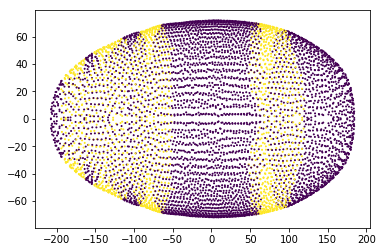

In [70]:
g = 'gt'

plt.scatter(gdf.x,gdf.y,s=1,c=insitu[g])
plt.scatter(gdf.x,-gdf.y,s=1,c=insitu[g])


In [71]:
dg_insitu = dg.loc[insitu.columns]

In [72]:
Xdi = dg_insitu.values.T

In [73]:
Xdi.shape


(1297, 84)

In [74]:
Xi = insitu.values

In [75]:
Xi.shape

(3039, 84)

In [76]:
from scipy.stats import pearsonr

In [77]:
c = 1

corrs = []

for i in Xi:
    corrs.append(pearsonr(Xdi[c],i)[0])

(array([ 41., 183., 383., 481., 700., 680., 354., 142.,  64.,  11.]),
 array([-0.17079788, -0.08651391, -0.00222995,  0.08205401,  0.16633797,
         0.25062193,  0.33490589,  0.41918986,  0.50347382,  0.58775778,
         0.67204174]),
 <a list of 10 Patch objects>)

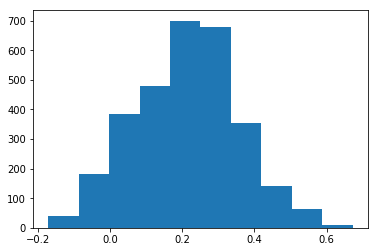

In [78]:
plt.hist(corrs)

In [79]:
gdfp = gdf.loc[[i for i in range(len(corrs)) if corrs[i] > .3]]

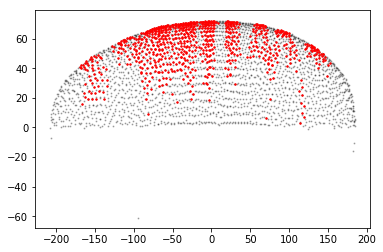

In [80]:
plt.scatter(gdf.x,gdf.y,s=1,c='black',alpha=.25)

plt.scatter(gdfp.x,gdfp.y,s=2,c='red')



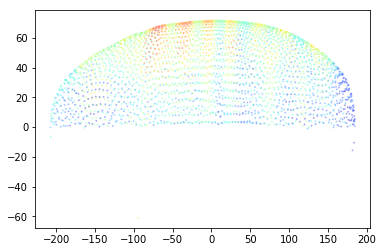

In [81]:
plt.scatter(gdf.x,gdf.y,s=1,alpha=.25,c=corrs,cmap='jet')

In [82]:
c = 6

score = []

for i in range(0,len(Xi)):
    s1 = np.median([Xdi[c][j] for j in range(84) if Xi[i][j] == 1])
    s0 = np.median([Xdi[c][j] for j in range(84) if Xi[i][j] == 0])
    score.append(s1-s0)

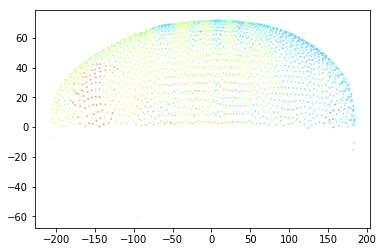

In [83]:
plt.scatter(gdf.x,gdf.y,s=1,alpha=.25,c=score,cmap='jet')

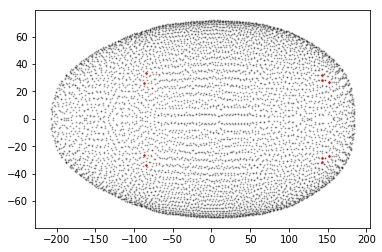

In [84]:
c = 40

score = []

for i in range(0,len(Xi)):
    s1 = np.median([Xdi[c][j] for j in range(84) if Xi[i][j] == 1])
    s0 = np.median([Xdi[c][j] for j in range(84) if Xi[i][j] == 0])
    score.append(s1-s0)
    
gdfp = gdf.loc[sorted(range(len(score)), key=lambda i: score[i])[-5:]]
plt.scatter(gdf.x,gdf.y,s=1,c='black',alpha=.25)
plt.scatter(gdf.x,-gdf.y,s=1,c='black',alpha=.25)
plt.scatter(gdfp.x,gdfp.y,s=2,c='red')
plt.scatter(gdfp.x,-gdfp.y,s=2,c='red')


In [85]:
bdt = pd.read_csv("data/single/bdtnp.txt",sep="\t")

In [86]:
bdt

,aay,Ama,Ance,Antp,apt,Blimp-1,bmm,bowl,brk,Btk29A,...,tkv,tll,toc,Traf4,trn,tsh,twi,zen,zen2,zfh1
0,0.116516,0.224190,0.033730,0.104307,0.673878,0.856570,0.469676,0.286151,0.320923,0.737946,...,0.353227,0.102896,0.153453,0.129360,0.087361,0.147089,0.225082,0.027564,0.297847,0.372422
1,0.113320,0.208761,0.044785,0.103447,0.743820,0.462554,0.570401,0.345240,0.320727,0.913163,...,0.268072,0.093506,0.206405,0.313327,0.230506,0.190749,0.440296,0.024157,0.455723,0.389489
2,0.092872,0.172598,0.036166,0.096985,0.838291,0.467538,0.478229,0.377768,0.297598,0.931254,...,0.315466,0.090488,0.196441,0.161869,0.102645,0.177968,0.347098,0.019817,0.598716,0.502384
3,0.101251,0.207963,0.066009,0.092872,0.597823,0.497481,0.479122,0.580058,0.334111,0.746340,...,0.211007,0.110080,0.205833,0.287976,0.382287,0.189138,0.542763,0.019013,0.570066,0.397117
4,0.127009,0.176440,0.084271,0.027938,0.621983,0.833522,0.680243,0.201147,0.359235,0.755608,...,0.447295,0.079012,0.152232,0.105062,0.109857,0.166762,0.259750,0.025874,0.349462,0.498263
5,0.128472,0.278907,0.066009,0.076158,0.597823,0.497481,0.468563,0.311903,0.334111,0.781285,...,0.245797,0.105309,0.223213,0.287976,0.382287,0.195660,0.570630,0.019588,0.570066,0.403437
6,0.125434,0.204720,0.066936,0.054685,0.723092,0.759814,0.539329,0.317423,0.252024,0.862493,...,0.292914,0.095786,0.195247,0.192128,0.119346,0.187042,0.351271,0.028051,0.462000,0.441476
7,0.125316,0.197398,0.066936,0.047705,0.678419,0.759814,0.377704,0.317423,0.356944,0.853344,...,0.342025,0.097189,0.152306,0.128800,0.099813,0.182691,0.292666,0.032647,0.324023,0.571105
8,0.097122,0.220930,0.075279,0.058213,0.751528,0.723543,0.470335,0.319268,0.300246,0.810930,...,0.263736,0.098921,0.198739,0.268868,0.263963,0.206741,0.429547,0.018592,0.399797,0.473206
9,0.127801,0.220199,0.081807,0.037052,0.560372,0.534561,0.677358,0.261649,0.314079,0.952841,...,0.307919,0.107702,0.263115,0.240782,0.296459,0.158797,0.346388,0.025457,0.510477,0.475470


In [ ]:
tsne = TSNE(n_components=2, early_exaggeration = 20, method='exact', random_state = 2056814238)
bdt_embed = tsne.fit_transform(bdt.values)